## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from itertools import combinations

In [2]:
#загрузка файла и вывод информации
gym = pd.read_csv('/datasets/gym_churn.csv')
display(gym.head())
gym.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [3]:
# проверка на дубликаты
gym.duplicated().sum()

0

Согласно информации о данных пропущенные значения отсутствуют, типы данных соответствуют содержимому. Явные дубликаты отсутсвуют.

## Исследовательский анализ данных (EDA)

In [4]:
# изучим средние значения и стандартные отклонения
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Количество мужчин и женщин примерно одинаковое;
- Большая часть клинтов проживает или работает в районе, где находится фитнес-центр;
- Почти половина клиентов является сотрудниками компаний-партнёров клуба;
- 1/3 клиентов записалась в клуб в рамках акции «приведи друга»;
- почти все клиенты оставили контактный телефон;
- медианное значение длительности текущего абонимента составляет 1 месяц при среднем 4,68, что говорит о большом количестве клиентов с месячным абониментом;
- меньше половины клиентов посещали групповые занятия;
- Средний возраст клиентов составляет 29 лет, при этом возростной разброс 18 - 41 год;
- Около 140 тыс клуб зарабатывает на допуслугах, при этом медианное и среднее значение близки;
- в среднем до окончания действия абониментов осталось 4 месяца, но как мы видели ранее, медианное также составляет 1 месяц;
- Среднее время с момента первого обращения в клуб как и медианное составляет 3 месяца, а максимальное 31 месяц, можно говорить о том, что в клубе значительно больше новых клинтов, чем посещающих его постоянно;
- средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц примерно одинаковые - около 2 занятий в неделю;
- Отток в текущем месяце составил чуть больше четверти клиентов.

In [5]:
# средние значения признаков по группам отток 0/1
gym.groupby('Churn').mean().T.style

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


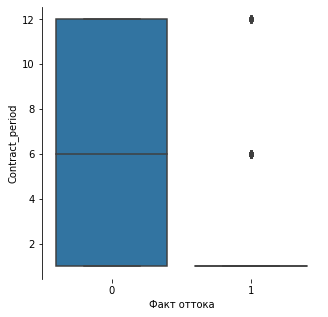

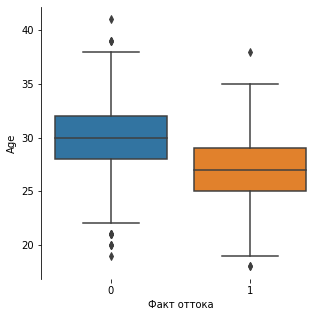

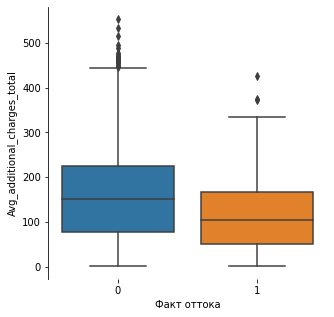

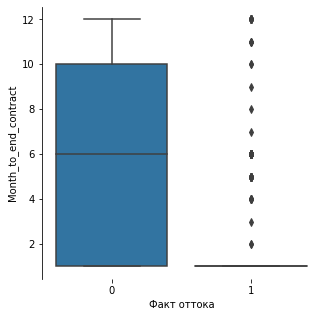

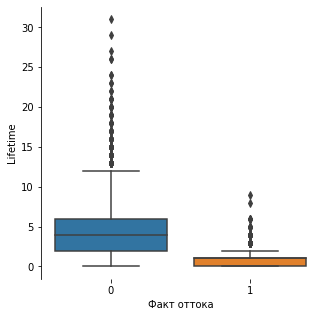

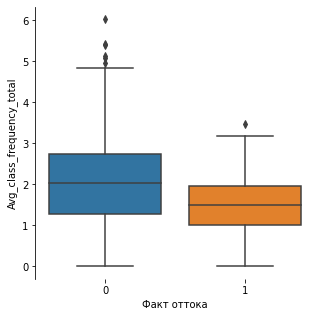

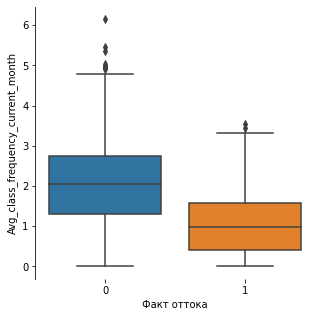

In [6]:
#построим "ящик с усами" для небинарных признаков
gym_not_bin = gym[['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']]
for col in gym_not_bin.drop('Churn', axis = 1).columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=gym_not_bin, x = 'Churn', y = col)
    sns.despine(bottom=True)
    plt.xlabel('Факт оттока')
    plt.show()

Из данных видно, что пол, наличие контактного телефона и возраст мало влияют на факт оттока. А вот такие признаки как: Contract_period, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month значительно влияют на возможность оттока. Получается, что чем дольше и чаще клиент посещает и планирует посещать (длительность абонимента) фитнес-клуб, тем меньше вероятность его ухода.

In [7]:
import warnings
warnings.filterwarnings("ignore")

Факт оттока - 0
-------------------------------


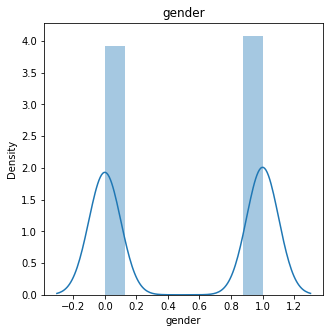

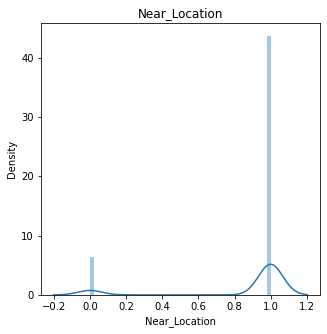

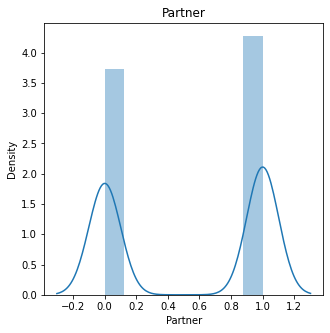

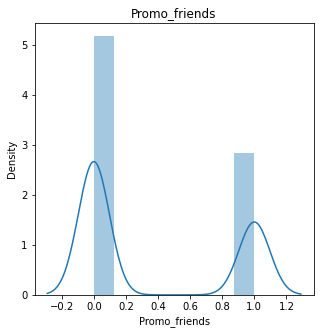

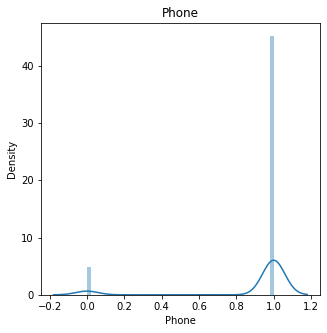

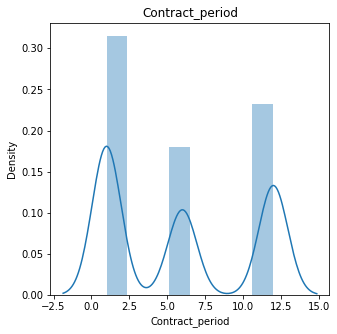

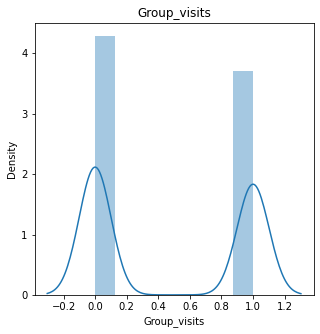

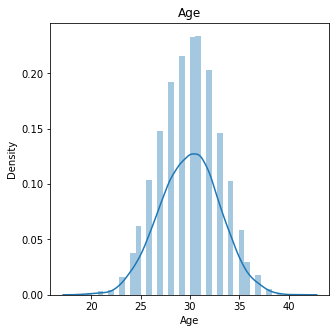

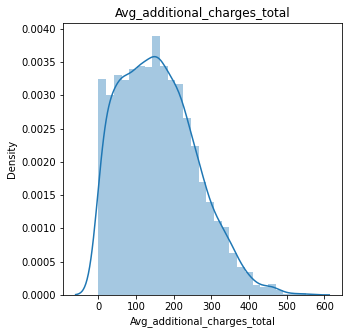

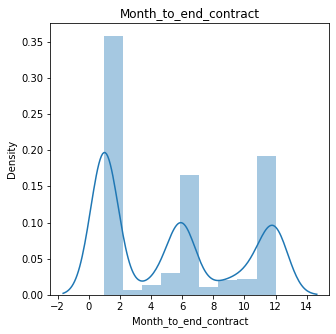

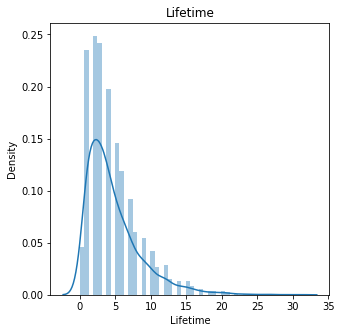

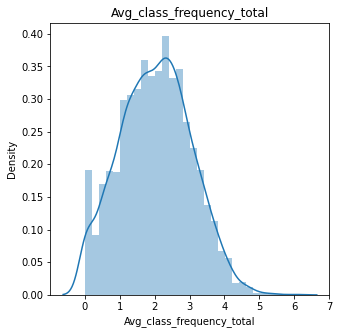

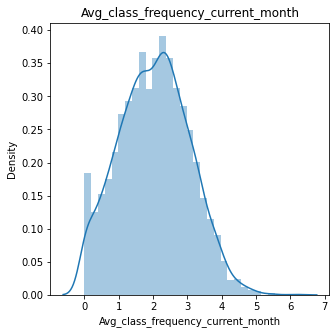

Факт оттока - 1
-------------------------------


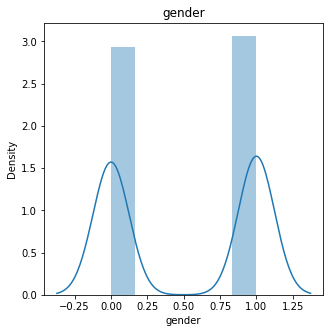

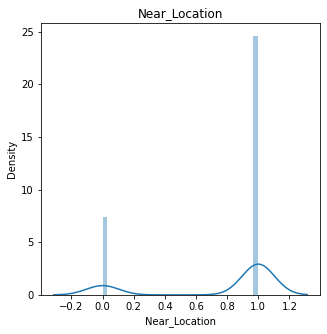

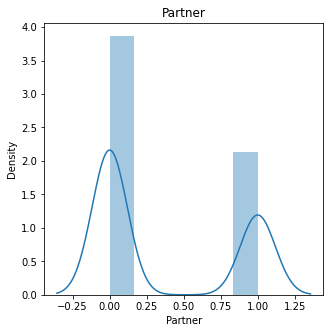

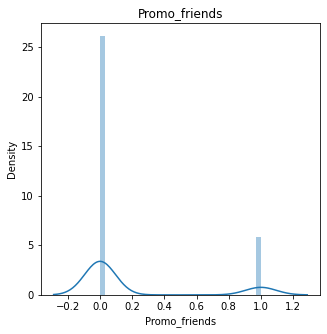

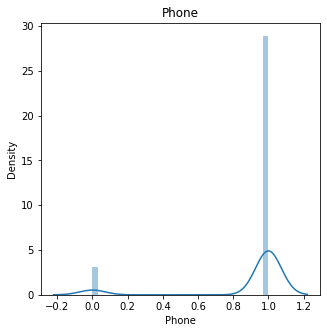

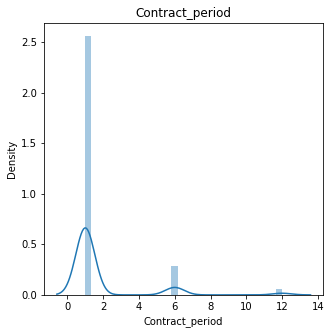

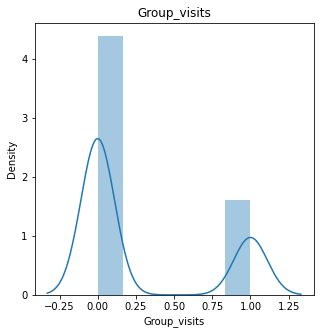

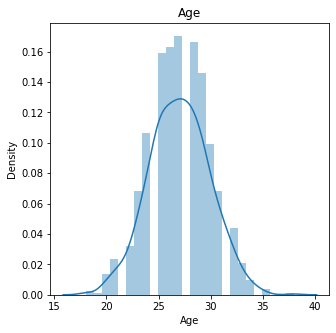

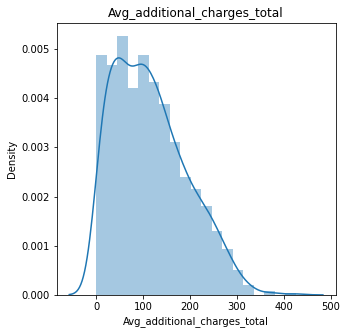

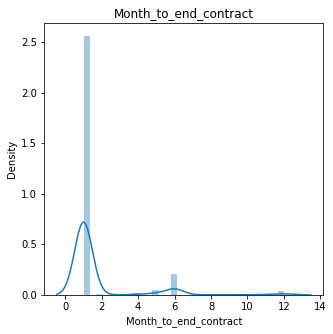

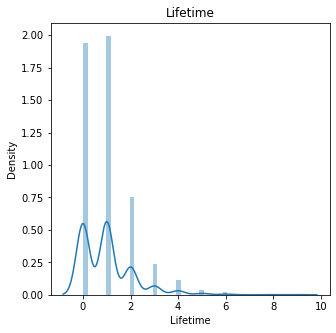

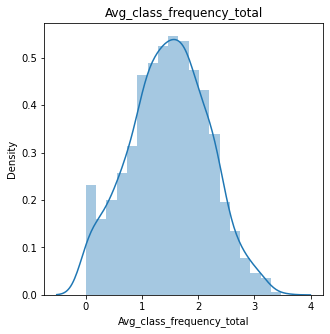

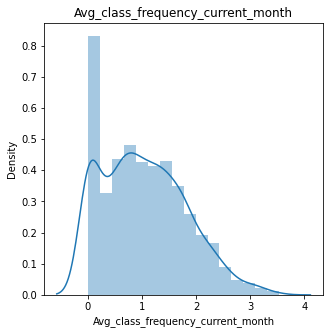

In [8]:
for i in range(gym['Churn'].unique().sum() + 1):
    gym_churn = gym[gym['Churn'] == i]
    print('Факт оттока -', i)
    print('-------------------------------')
    for col in gym_churn.drop('Churn', axis=1).columns:
        plt.figure(figsize=(5, 5))
        sns.distplot(gym_churn[col])
        plt.title(col)
        plt.show()

Судя по графикам данные распределены равномерно, явные выбросы отсутствуют.

<AxesSubplot:>

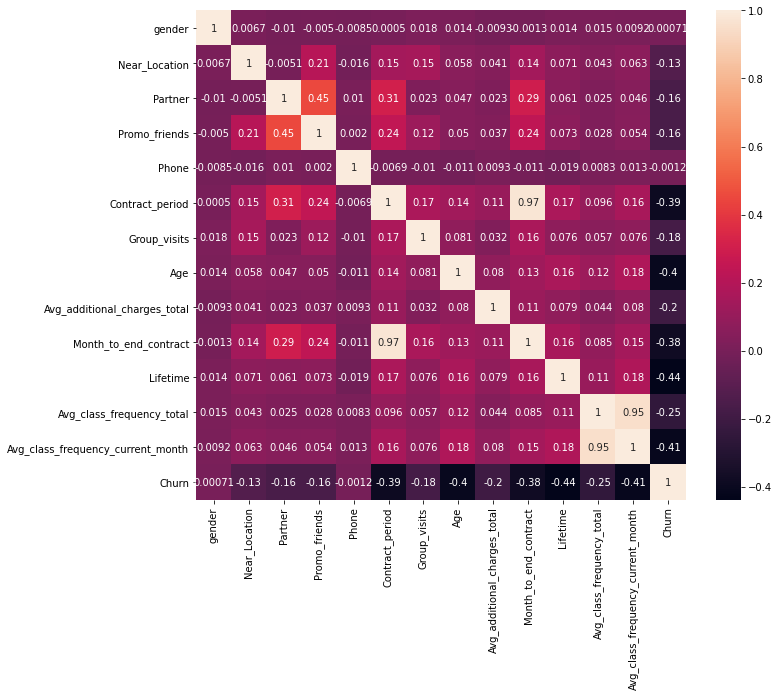

In [9]:
# построим матрицу корреляции
cm = gym.corr()
plt.subplots(figsize=(11, 9))
sns.heatmap(cm, annot=True, square=True)

При визуализации матрицы корреляции видно, что имеются:
-  мультиколлинеарные признаки: 'Avg_class_frequency_total' - 'Avg_class_frequency_current_month', 'Contract_period' - 'Month_to_end_contract'.

- признаки с близкой к нулю корреляцией с целевой переменной: 'gender', 'Phone'.

## Модель прогнозирования оттока клиентов

In [10]:
#задаем признаки и целевую переменную
X = gym.drop('Churn', axis=1)
y = gym['Churn']

#разделияем выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

In [11]:
#задаем способы обучения модели - Логистическая регрессия и Случайный лес
models = [
    LogisticRegression(random_state=0, solver='liblinear'),
    RandomForestClassifier(n_estimators = 100, random_state = 0),
    ]

In [12]:
#создадим функцию для обучения модели и вывода необходимых метрик
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [13]:
# выводим метрики
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(random_state=0, solver='liblinear')
Accuracy:0.93 Precision:0.89 Recall:0.84 
RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.88 Recall:0.83 


В данном случае метод Логистической регрессии показал себя по всем метрикам немного лучше метода Случайный лес. Для способа Логистическая регрессия Доля правильных ответов составила 93%, Точность - 89%, Полнота - 84%.

## Кластеризация клиентов

In [14]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# формируем таблицу связок
linked = linkage(X_sc, method = 'ward')

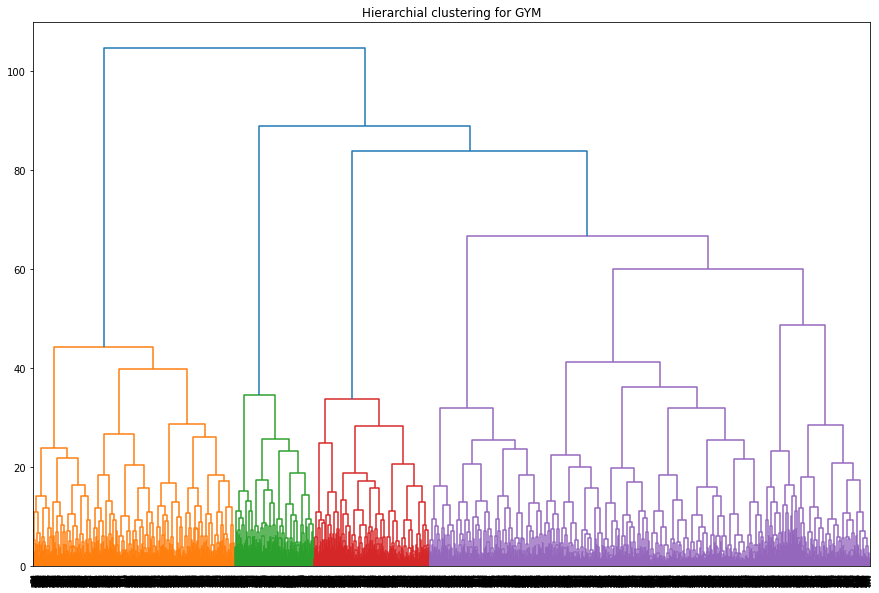

In [15]:
# нарисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Разными цветами дендрограмма разбивается на 4 кластера. Но мы примем за необходимое число кластеров 5.

In [16]:
km = KMeans(n_clusters=5, random_state=0) #передаем алгоритму K-Means количество кластеров = 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров
gym['cluster_km'] = labels # создадим в таблице новый столбец с индексами групп

In [17]:
# посмотрим количество клиентов в кластерах
display(gym.groupby('cluster_km')['gender'].count())

cluster_km
0    1010
1     385
2     505
3    1262
4     838
Name: gender, dtype: int64

In [18]:
# отобразим средние значения признаков по кластерам
display(gym.groupby('cluster_km').mean().T.style)

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
Near_Location,0.959406,0.862338,0.000000,1.000000,0.976134
Partner,0.783168,0.470130,0.463366,0.350238,0.356802
Promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
Phone,1.000000,0.000000,1.000000,1.000000,0.998807
Contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
Group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
Age,29.982178,29.301299,28.477228,28.167987,30.125298
Avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
Month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


<b>Описание показательных черт кластеров:</b>

<b>Кластер 0:</b>
- <b>Доля оттока составляет 2.7%;</b>
- Большая часть клиентов данного кластера является сотрудниками компаний-партнёров клуба 
- Средняя длительность действующих абониментов составляет 11 месяцев;
- До окончания действия абонимента в среднем 10 месяцев;

<b>Кластер 1:</b>
- <b>Доля оттока составляет 26%;</b>
- Никто из клиентов в данном кластере не оставил контактный телефон;
- 

<b>Кластер 2:</b>
- <b>Доля оттока составляет 44%;</b>
- Никто из клиентов в данном кластере не живет или не работает в районе расположения клуба;
- Наименьший процент клиентов, посещавших групповые тренировки;

<b>Кластер 3:</b>
- <b>Доля оттока составляет 51%;</b>
- Все клиенты из данного кластера живут или работают рядом с клубом;
- Длительность текущего действующего абонемента менее 2 месяцев;
- Наименьшие расходы на доп.услуги клуба;

<b>Кластер 4:</b>
- <b>Доля оттока составляет 6.8%;</b>
- Наибольшие расходы на доп.услуги клуба;
- Время с момента первого обращения почти 5 месяцев;
- Средняя частота посещений зала - около 3 раз в неделю.

Кластеры с наименьшей и наибольшей долей оттока содержат больше всего клиентов.

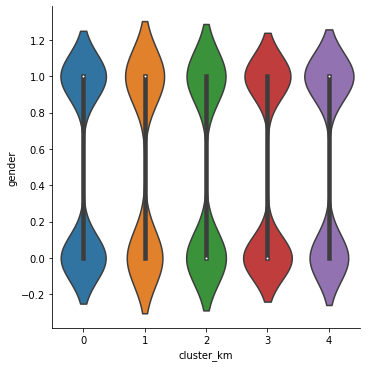

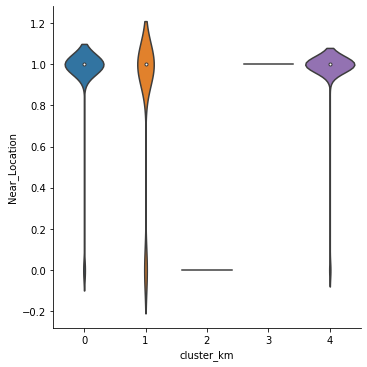

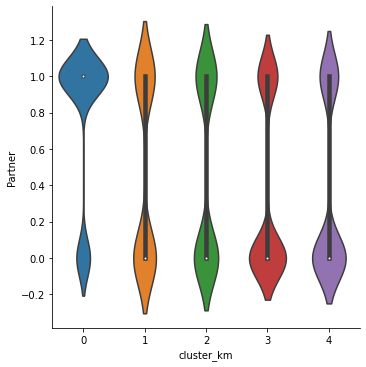

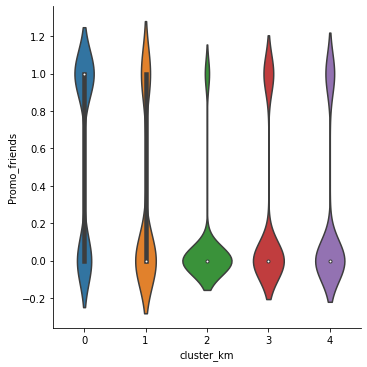

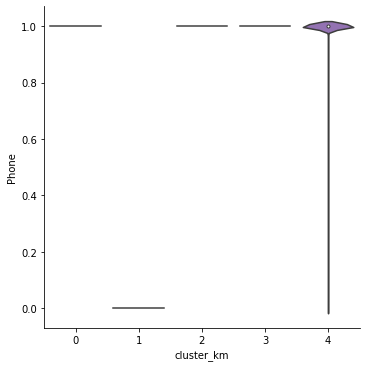

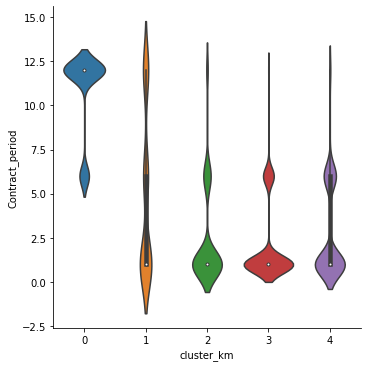

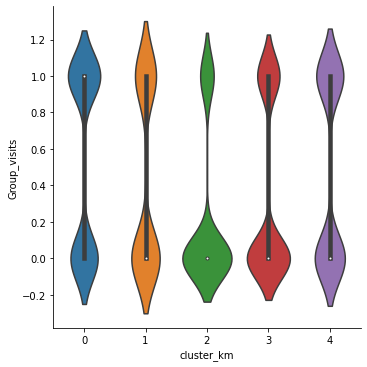

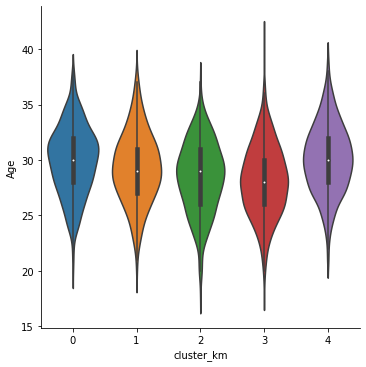

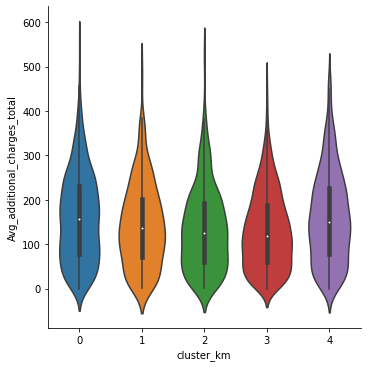

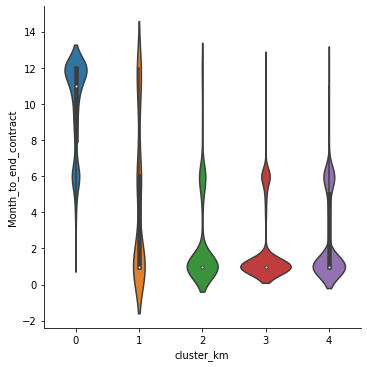

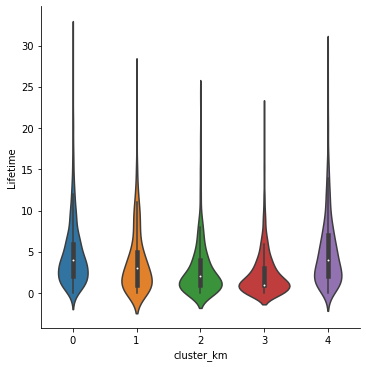

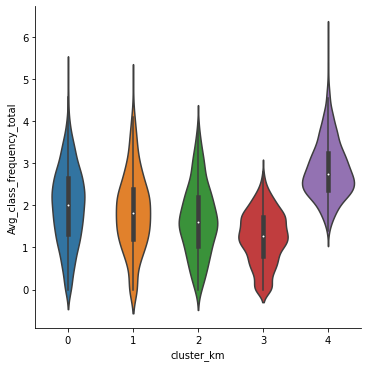

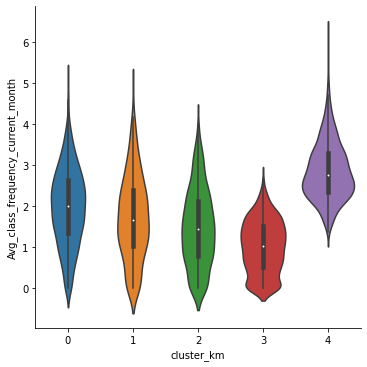

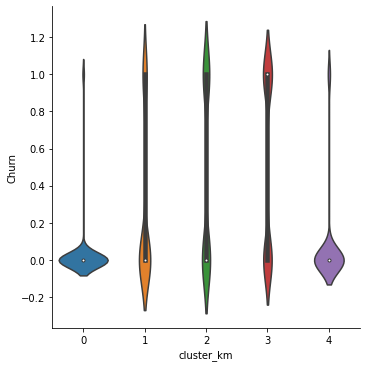

In [19]:
for col in gym.drop('cluster_km', axis=1).columns:
    sns.catplot(x="cluster_km", y=col, 
            kind="violin", split=True, data=gym)

## Общий вывод

Наименьший отток наблюдается среди клиентов, которые имеют наибольшие связи с фитнес-клубом: длительный абонимент, частые посещения тренажерных залов, более 4 месяцев.

<b>Рекомендации</b>
- увеличить продажу длительных абониментов (от 6 месяцев);
- добавить привилегии держателям длительных абониментов;
- распространять больше абониментов среди сотрудников компаний-партнеров клуба.